<a href="https://colab.research.google.com/github/crux007/crux007/blob/main/Sentiment_analysis_for_ratings_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import re
import nltk
import numpy as np
import seaborn as sns
from nltk import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Royal mail Data ratings.csv")

In [3]:
df.head(5)

,author_name,Date Published,reviewBody,Annotations
0,LINDSAY HARGREAVES,8/8/2018,The lady I spoke to seem to talk over me.Alway...,0
1,Terence King,2/5/2022,Easy website to navigate but holding back pric...,0
2,Nick Sargent,3/2/2019,"nice website and great variety, but payment no...",0
3,Mrs Caira,9/9/2019,"Online redirection form failed first time, app...",0
4,Alan Carter,8/8/2018,"The site is not very custom frendly,you have t...",0


In [4]:
df.shape

(4610, 4)

In [5]:
df.info

<bound method DataFrame.info of               author_name Date Published  \
0      LINDSAY HARGREAVES       8/8/2018   
1            Terence King       2/5/2022   
2            Nick Sargent       3/2/2019   
3               Mrs Caira       9/9/2019   
4             Alan Carter       8/8/2018   
...                   ...            ...   
4605             Customer       2/5/2022   
4606              Paddy K       3/2/2019   
4607              Melanie       9/9/2019   
4608  Eric Bates and Sons       8/8/2018   
4609             Customer       2/5/2022   

                                             reviewBody Annotations  
0     The lady I spoke to seem to talk over me.Alway...           0  
1     Easy website to navigate but holding back pric...           0  
2     nice website and great variety, but payment no...           0  
3     Online redirection form failed first time, app...           0  
4     The site is not very custom frendly,you have t...           0  
...                

In [6]:
df.dtypes

author_name       object
Date Published    object
reviewBody        object
Annotations       object
dtype: object

In [7]:
np.sum(df.isnull().any(axis=1))

390

In [8]:
missing_rows_count = df['reviewBody'].isnull().sum()
print("Total number of missing rows in reviewBody:", missing_rows_count)

Total number of missing rows in reviewBody: 0


In [9]:
df['reviewBody'] = df['reviewBody'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-9-0f4252d5adce>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewBody'] = df['reviewBody'].str.replace("[^a-zA-Z#]", " ")


In [10]:
df['reviewBody'] = df['reviewBody'].str.casefold()
print (df.head(10))

          author_name Date Published  \
0  LINDSAY HARGREAVES       8/8/2018   
1        Terence King       2/5/2022   
2        Nick Sargent       3/2/2019   
3           Mrs Caira       9/9/2019   
4         Alan Carter       8/8/2018   
5       Joanna Rankin       2/5/2022   
6               Neil        3/2/2019   
7   Christine Sifleet       9/9/2019   
8             David P       8/8/2018   
9    Unhappy Customer       2/5/2022   

                                          reviewBody Annotations  
0  the lady i spoke to seem to talk over me alway...           0  
1  easy website to navigate but holding back pric...           0  
2  nice website and great variety  but payment no...           0  
3  online redirection form failed first time  app...           0  
4  the site is not very custom frendly you have t...           0  
5  i redirected my post back in march for myself ...           0  
6  reasonable but could be more user friendly  su...           1  
7                      

In [12]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
sentiments = SIA()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["reviewBody"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["reviewBody"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["reviewBody"]]
df_cleaned = df[["reviewBody", "Positive", "Negative", "Neutral"]]
print(df_cleaned.head(10))

                                          reviewBody  Positive  Negative  \
0  the lady i spoke to seem to talk over me alway...     0.074     0.126   
1  easy website to navigate but holding back pric...     0.078     0.247   
2  nice website and great variety  but payment no...     0.095     0.309   
3  online redirection form failed first time  app...     0.000     0.163   
4  the site is not very custom frendly you have t...     0.051     0.122   
5  i redirected my post back in march for myself ...     0.017     0.077   
6  reasonable but could be more user friendly  su...     0.166     0.000   
7                                very very expensive     0.000     0.000   
8  wasn t aware that charges were now applicable ...     0.000     0.139   
9  don t see how you should register just to get ...     0.104     0.000   

   Neutral  
0    0.800  
1    0.676  
2    0.596  
3    0.837  
4    0.827  
5    0.907  
6    0.834  
7    1.000  
8    0.861  
9    0.896  


In [14]:
df_cleaned.head(5)

,reviewBody,Positive,Negative,Neutral
0,the lady i spoke to seem to talk over me alway...,0.074,0.126,0.800
1,easy website to navigate but holding back pric...,0.078,0.247,0.676
2,nice website and great variety but payment no...,0.095,0.309,0.596
3,online redirection form failed first time app...,0.000,0.163,0.837
4,the site is not very custom frendly you have t...,0.051,0.122,0.827


In [16]:
df_cleaned.describe()

,Positive,Negative,Neutral
count,4610.000000,4610.000000,4610.000000
mean,0.081939,0.082088,0.835976
std,0.104211,0.100193,0.129383
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.771000
50%,0.057000,0.057000,0.847000
75%,0.128000,0.127000,0.922000
max,1.000000,0.754000,1.000000


In [18]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Positive,4610.0,0.081939,0.104211,0.0,0.000,0.057,0.128,1.000
Negative,4610.0,0.082088,0.100193,0.0,0.000,0.057,0.127,0.754
Neutral,4610.0,0.835976,0.129383,0.0,0.771,0.847,0.922,1.000


In [25]:
positive_count = df[df["Positive"] > df["Negative"]]["Positive"].count()
negative_count = df[df["Negative"] > df["Positive"]]["Negative"].count()
neutral_count = df[(df["Positive"] == df["Negative"]) & (df["Positive"] > 0) & (df["Negative"] > 0)]["Neutral"].count()

print("Total number of positive rows:", positive_count)
print("Total number of negative rows:", negative_count)
print("Total number of neutral rows:", neutral_count)

Total number of positive rows: 1922
Total number of negative rows: 1855
Total number of neutral rows: 15


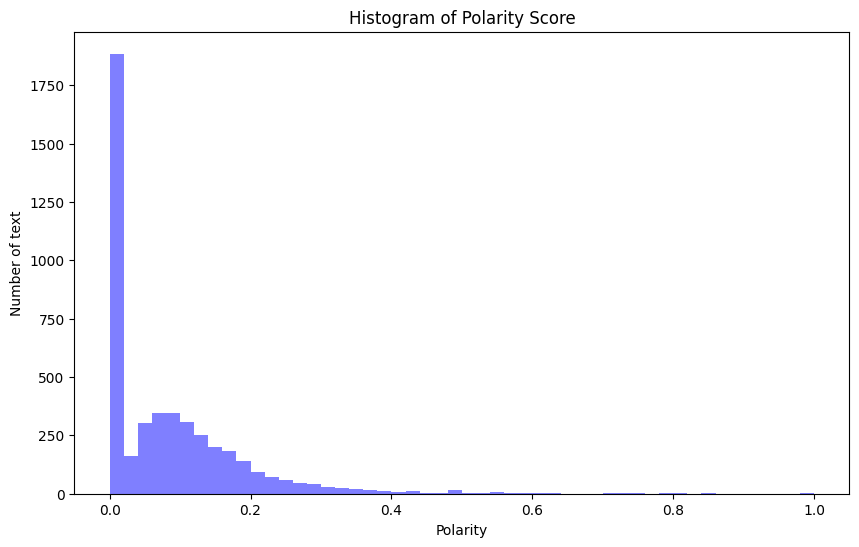

In [19]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_cleaned.Positive, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of text')
plt.title('Histogram of Polarity Score')
plt.show();

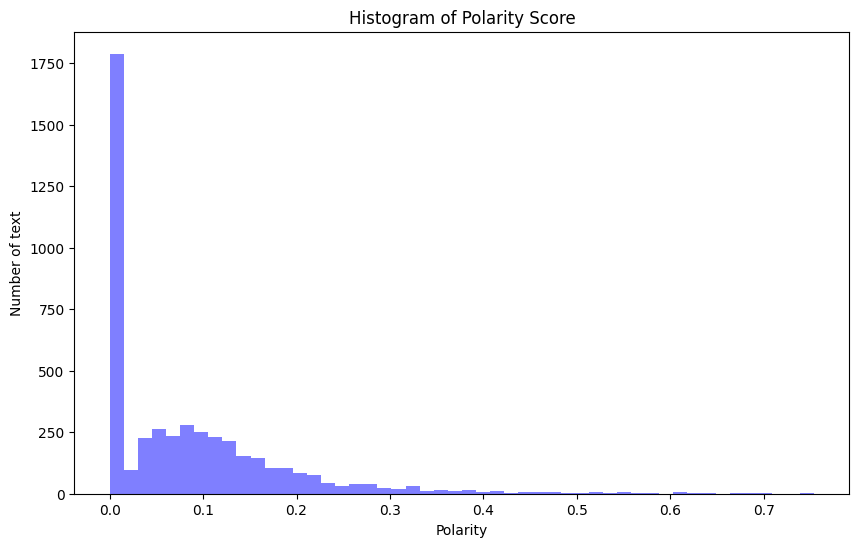

In [20]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_cleaned.Negative, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of text')
plt.title('Histogram of Polarity Score')
plt.show();

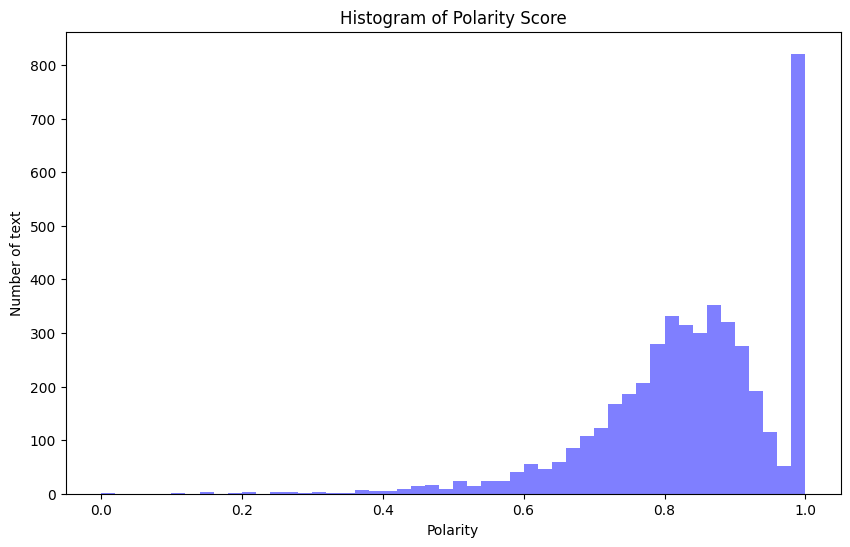

In [21]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_cleaned.Neutral, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of text')
plt.title('Histogram of Polarity Score')
plt.show();

In [22]:
import matplotlib.pyplot as plt

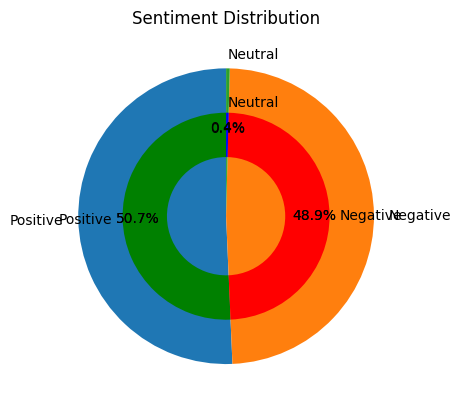

In [31]:
sentiment_counts = [positive_count, negative_count, neutral_count]
sentiment_labels = ['Positive', 'Negative', 'Neutral']

plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')

total_rows = sum(sentiment_counts)
sizes = [count/total_rows for count in sentiment_counts]
plt.gca().set_aspect('equal')
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, radius=0.7, colors=['green', 'red', 'blue'], wedgeprops=dict(width=0.3))
plt.title('Sentiment Distribution')

plt.show()

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

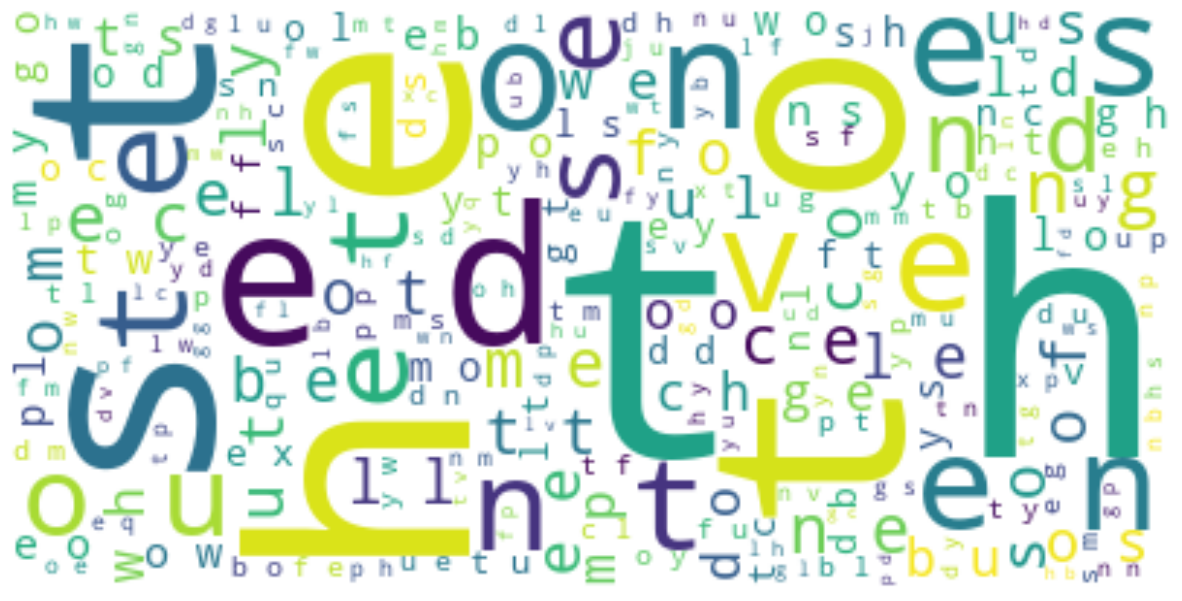

In [33]:
positive = " ".join([i for i in df_cleaned['reviewBody'][df_cleaned['Positive'] > df_cleaned["Negative"]]])

wordcloud = WordCloud(background_color = "white").generate(" ".join(positive))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

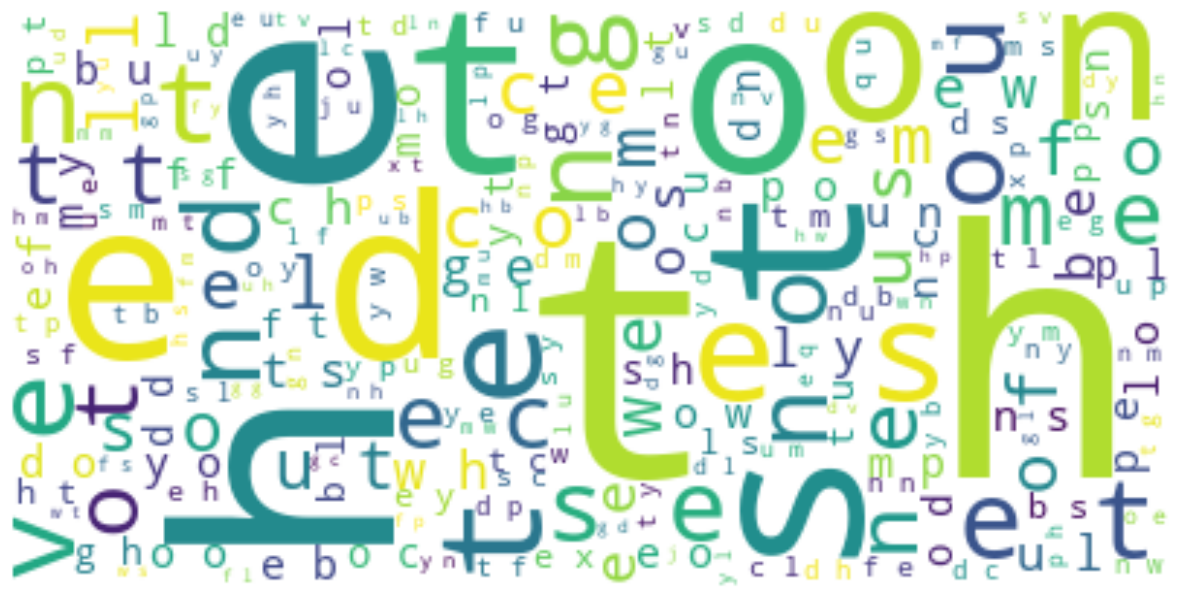

In [34]:
negative = " ".join([i for i in df_cleaned['reviewBody'][df_cleaned['Negative'] > df_cleaned["Positive"]]])

wordcloud = WordCloud(background_color = "white").generate(" ".join(negative))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
from textblob import TextBlob

df_cleaned['reviewBody']= df_cleaned['reviewBody'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df_cleaned['polarity'] = df_cleaned['reviewBody'].apply(pol)
df_cleaned['subjectivity'] = df_cleaned['reviewBody'].apply(sub)
df_cleaned

<ipython-input-36-a493284b0fc6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['reviewBody']= df_cleaned['reviewBody'].astype(str)
<ipython-input-36-a493284b0fc6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['polarity'] = df_cleaned['reviewBody'].apply(pol)
<ipython-input-36-a493284b0fc6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,reviewBody,Positive,Negative,Neutral,polarity,subjectivity
0,the lady i spoke to seem to talk over me alway...,0.074,0.126,0.800,0.075000,0.616667
1,easy website to navigate but holding back pric...,0.078,0.247,0.676,-0.075000,0.525000
2,nice website and great variety but payment no...,0.095,0.309,0.596,0.148810,0.507143
3,online redirection form failed first time app...,0.000,0.163,0.837,-0.125000,0.316667
4,the site is not very custom frendly you have t...,0.051,0.122,0.827,-0.250000,0.450000
...,...,...,...,...,...,...
4605,i have a registered account but still spent ha...,0.113,0.093,0.795,-0.088889,0.422222
4606,it s not difficul to purchase from royal mail ...,0.070,0.116,0.814,0.296333,0.611333
4607,it seems that with every order there is an iss...,0.054,0.101,0.844,-0.027083,0.433333
4608,items are easy to purchase and delivery is pro...,0.104,0.078,0.819,0.069444,0.655556
